In [9]:
# Load required packages
library(alakazam)
library(tigger)
library(dplyr)
library(scales)
library(ggplot2)
library(airr)
library(shazam)
library(ape)
library(dowser)

# read the database
db <- read_airr("changeo_10x_output_032822/filtered_contig_heavy_productive-T.tsv")

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 


Attaching package: ‘dowser’


The following objects are masked from ‘package:alakazam’:

    ExampleDb, ExampleTrees




In [2]:
db <- distToNearest(db, model="ham", normalize="len", vCallColumn="v_call", nproc=8)
# Determine threshold
threshold <- findThreshold(db$dist_nearest, method="density")
thr <- round(threshold@threshold, 2)
thr

[1] NA

Warning message:
“Removed 1 rows containing missing values (geom_vline).”


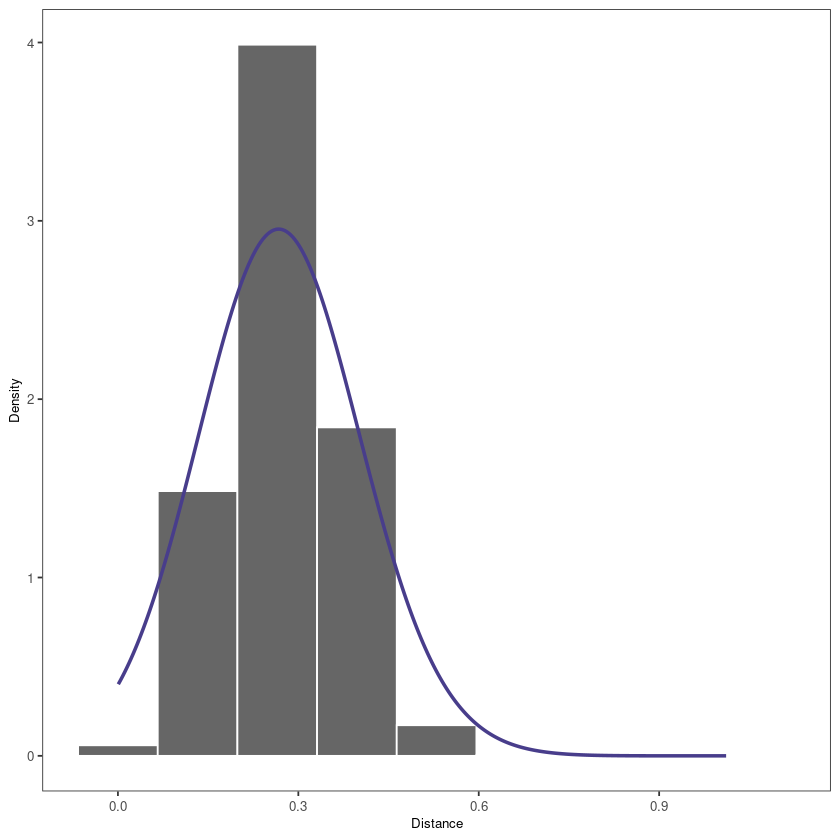

In [5]:
# plot the distribution
plot(threshold)

In [61]:
# read in the data
db <- readIgphyml("changeo_10x_output_032822/filtered_contig_heavy_germ-pass_igphyml-pass.tab", format="phylo",
      branches="mutations")

null device 
          1

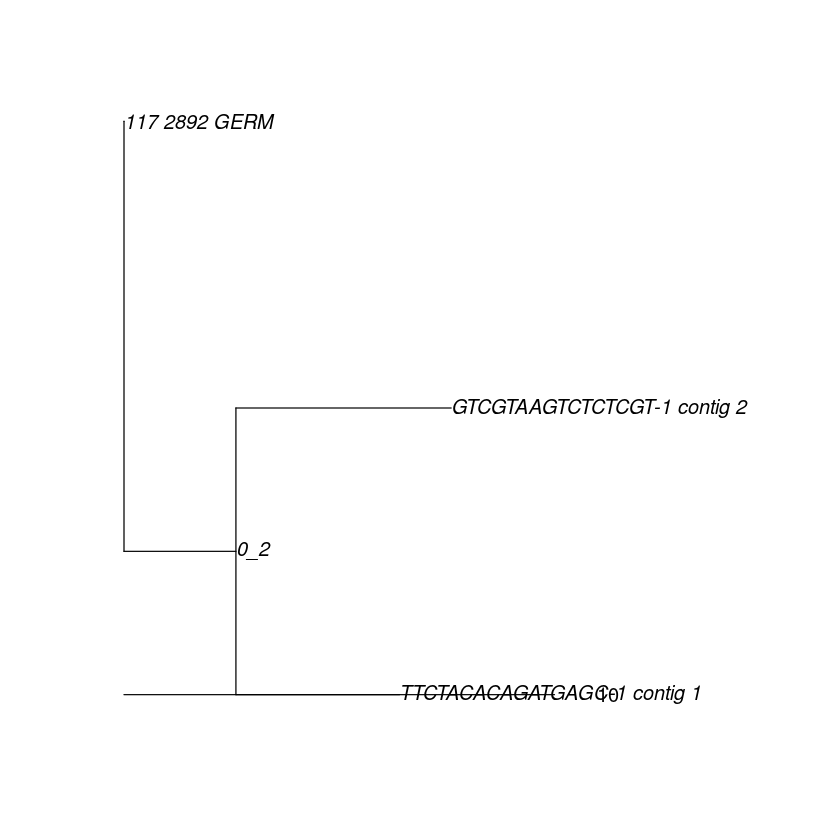

In [75]:
plot(db$trees[[1]],show.node.label=TRUE)
add.scale.bar(length=10)
dev.off()

null device 
          1

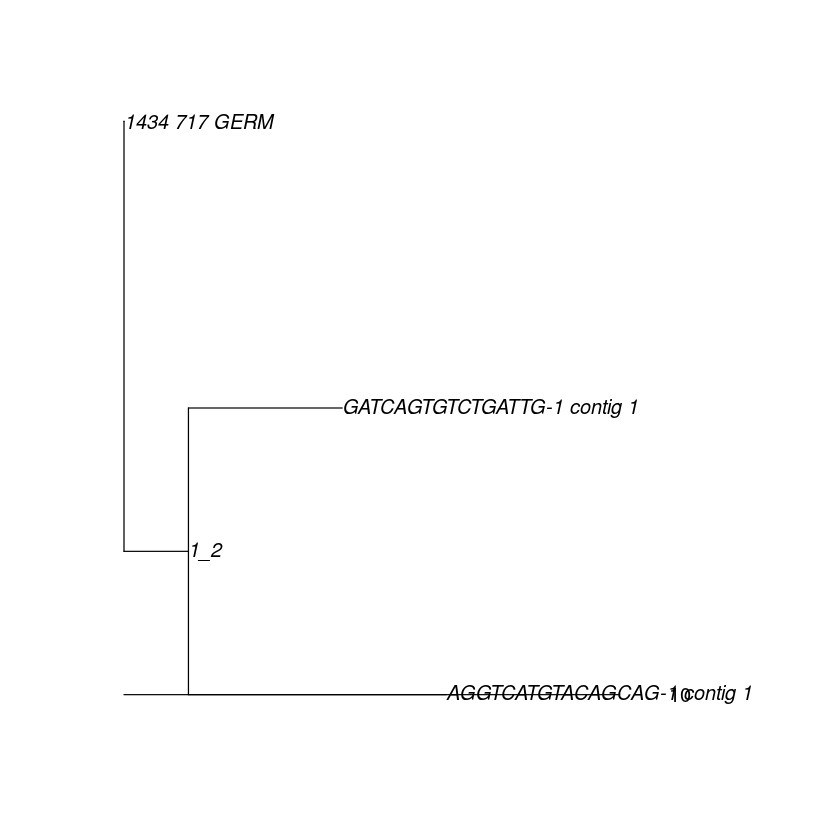

In [74]:
plot(db$trees[[2]],show.node.label=TRUE)
add.scale.bar(length=10)
dev.off()

null device 
          1

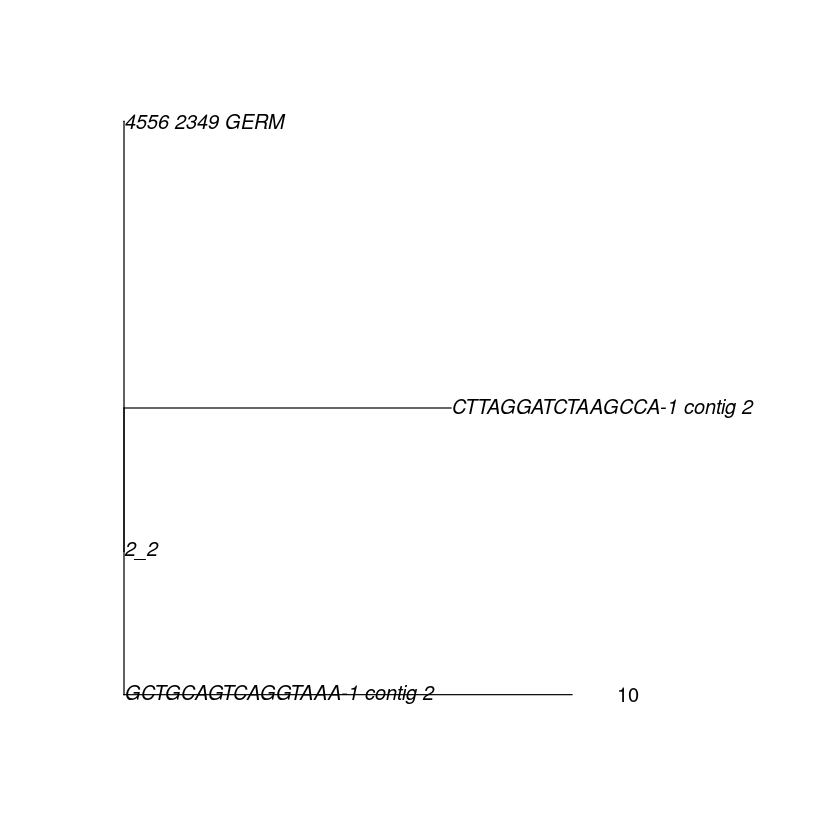

In [71]:
plot(db$trees[[3]],show.node.label=TRUE)
add.scale.bar(length=10)
dev.off()

In [130]:
# read the database
db <- read_airr("changeo_10x_output_032822/filtered_contig_heavy_germ-pass.tsv")

make <- makeAirrClone(
db,
id = "sequence_id",
seq = "sequence_alignment",
germ = "germline_alignment_d_mask",
v_call = "v_call",
j_call = "j_call",
junc_len = "junction_length",
clone = "clone_id",
mask_char = "N",
max_mask = 0,
pad_end = TRUE,
text_fields = NULL,
num_fields = NULL,
seq_fields = NULL,
add_count = TRUE,
verbose = FALSE,
collapse = TRUE,
chain = "H",
heavy = NULL,
cell = "cell_id",
locus = "locus",
traits = NULL,
mod3 = TRUE,
randomize = TRUE,
use_regions = TRUE,
dup_singles = FALSE
)

glimpse(db)

Rows: 4,474
Columns: 62
$ sequence_id               <chr> "CGAGCCATCAAGATCC-1_contig_2", "ACTTTCACAGG…
$ sequence                  <chr> "TGGGGAACAACATATGTCCAATGTCCTCTCCACAGGCACTGA…
$ rev_comp                  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ productive                <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ v_call                    <chr> "IGHV1-18*01", "IGHV1-18*01", "IGHV1-61*01"…
$ d_call                    <chr> "IGHD2-9*01", "IGHD2-3*01", "IGHD2-4*01,IGH…
$ j_call                    <chr> "IGHJ3*01", "IGHJ3*01", "IGHJ2*01", "IGHJ2*…
$ sequence_alignment        <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAG…
$ germline_alignment        <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAG…
$ junction                  <chr> "TGTGCAAGATCGTCCTACTACGGTTCGTTTGCTTACTGG", …
$ junction_aa               <chr> "CARSSYYGSFAYW", "CARNDGYFWFAYW", "CASIAYDY…
$ v_cigar                   <chr> "116S294=", "111S294=", "77S293=", "112S218…
$ d_cigar                   

In [147]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 3 x 4
  clone_id  data       locus  seqs
  <chr>     <list>     <chr> <int>
1 117_2892  <airrClon> IGH       2
2 1434_717  <airrClon> IGH       2
3 4556_2349 <airrClon> IGH       2


In [145]:
clones <- getTrees(clones, build="igphyml", 
    exec="/usr/local/share/igphyml/src/igphyml", nproc=16)

print(clones)

clones$trees[[1]]$omega_mle

Warning message in buildIgphyml(data, igphyml = exec, temp_path = file.path(dir, :
“Dowser igphyml doesn't mask split codons!”


# A tibble: 3 x 5
  clone_id  data       locus  seqs trees       
  <chr>     <list>     <chr> <int> <named list>
1 117_2892  <airrClon> IGH       2 <phylo>     
2 1434_717  <airrClon> IGH       2 <phylo>     
3 4556_2349 <airrClon> IGH       2 <phylo>     


NULL

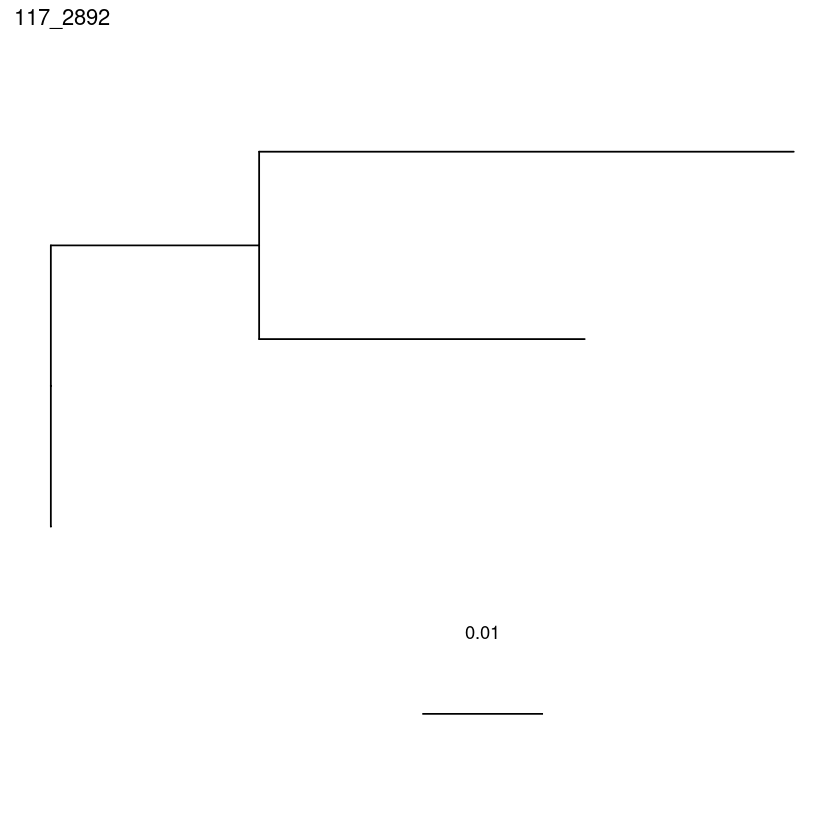

[[1]]

[[2]]

[[3]]


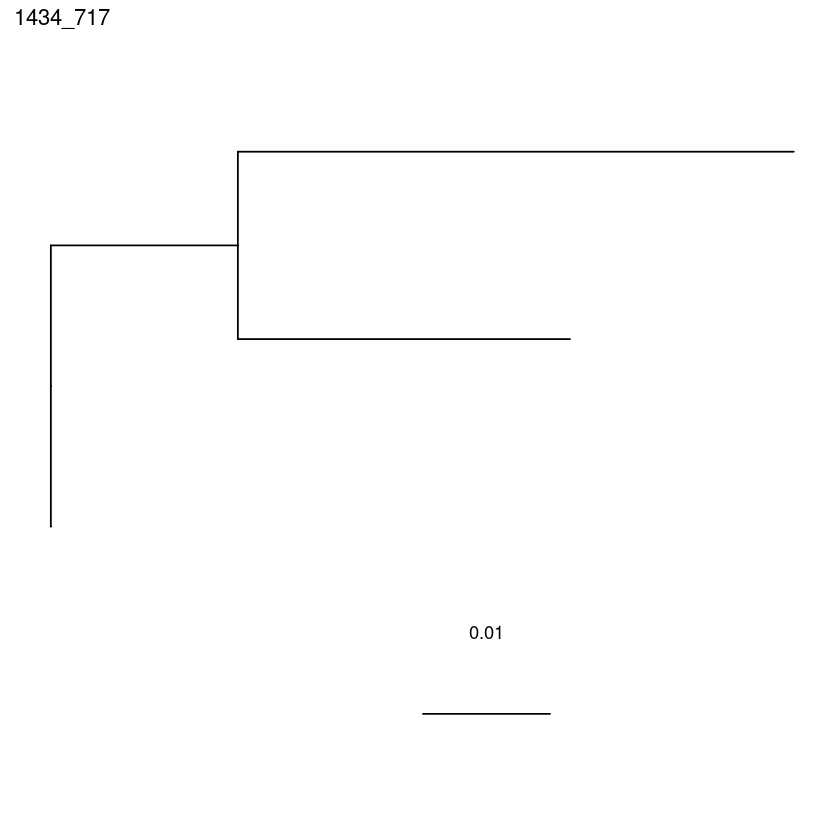

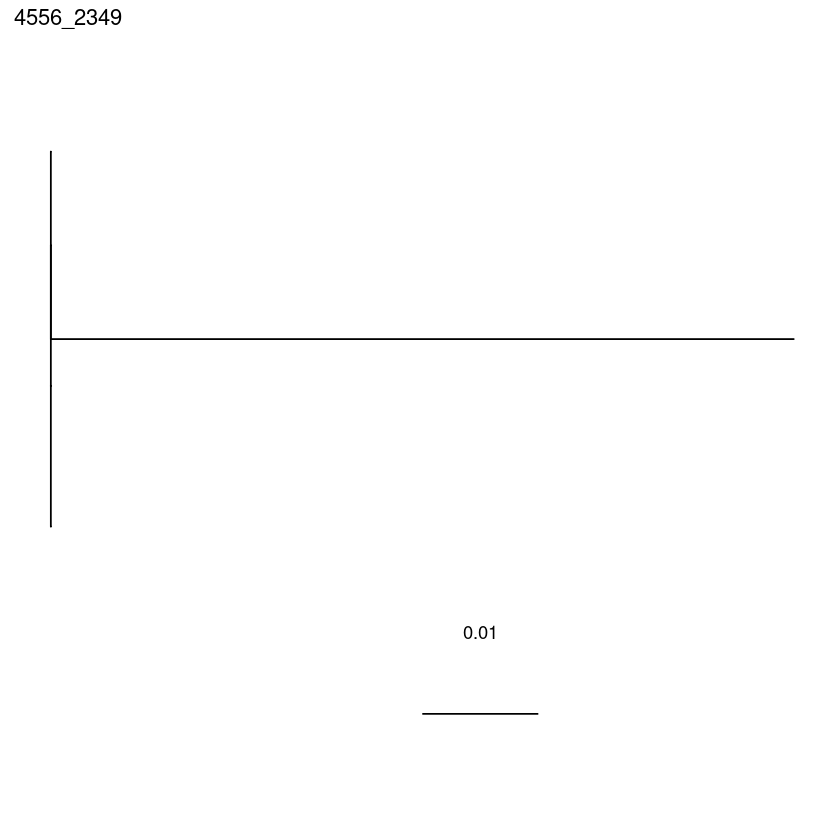

In [76]:
plotTrees(clones)

In [117]:
getTrees(
clones,
trait = NULL,
id = NULL,
dir = NULL,
modelfile = NULL,
build = "pratchet",
exec = NULL,
igphyml = NULL,
fixtrees = FALSE,
nproc = 16,
quiet = 0,
rm_temp = TRUE,
)

clone_id  data                                                    locus seqs
1 117_2892  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
2 1434_717  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
3 4556_2349 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
  trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'sequence_id' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pa

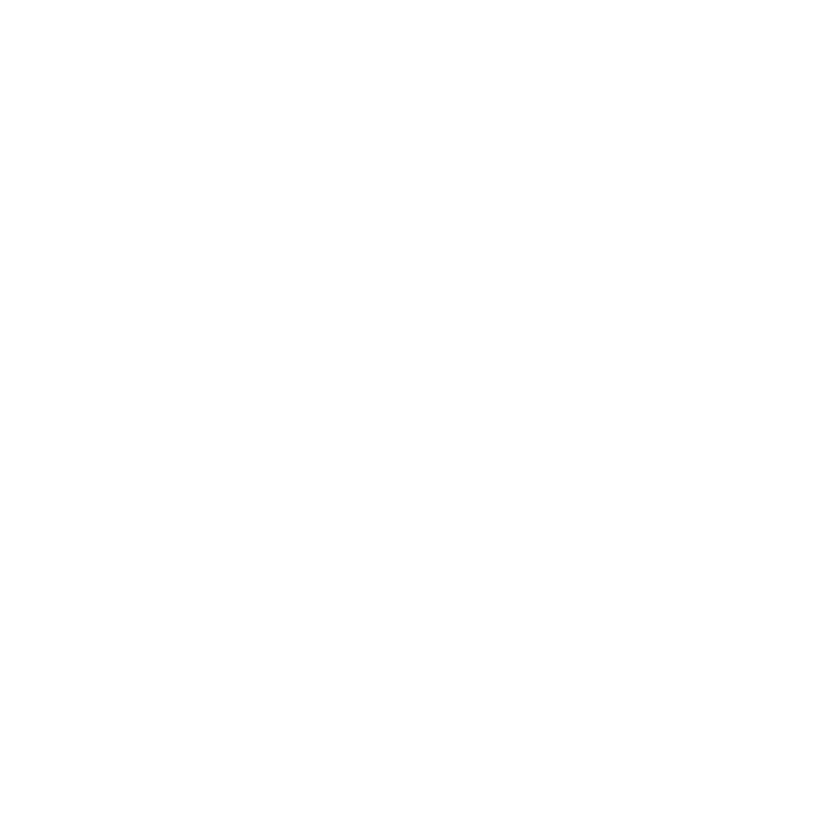

In [131]:
plotTrees(clones,
         nodes = FALSE,
         tips = "sequence_id")